### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

    The independent variable : Test types (congruent / incogruent)
    The dependent variable : Response time in second

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

We want to see the effect on the performance of the participants and see whether the difference in our sample is because of the fact the congruent and incongruent test are significantly different.

- μC : The congruent population's response time mean
- μI : The incongruent population's response time mean

**H0 : The null hypothesis, that the congruent and incongruent populations are not significantly different (μC − μI = 0)**

**HA : The alternative hypothesis, that the congruent and incongruent populations are significantly different (μC − μI ≠ 0)**

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

    The mean of congruent samples is ---> 14.051125
    The mean of incongruent samples is ---> 22.015917
    AND 
    The standard deviation of congruent samples is ---> 3.559358
    The standard deviation of incongruent samples is ---> 4.797057

In [18]:
# Perform the analysis here
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import math
df=pd.read_csv('stroopdata.csv')
df.head(10)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [3]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

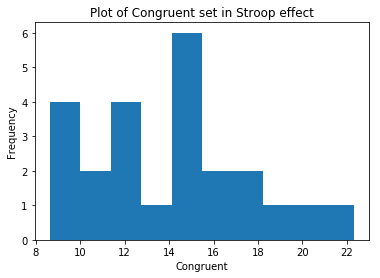

In [4]:
# Build the visualizations here
# plot histograms for values in Congruent and Incongruent sets
# for Congruent set
plt.hist(df['Congruent'])
plt.xlabel('Congruent')
plt.ylabel('Frequency')
plt.title('Plot of Congruent set in Stroop effect');

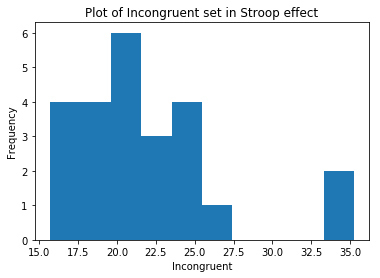

In [5]:
#for incongruent 
plt.hist(df['Incongruent'])
plt.xlabel('Incongruent')
plt.ylabel('Frequency')
plt.title('Plot of Incongruent set in Stroop effect');

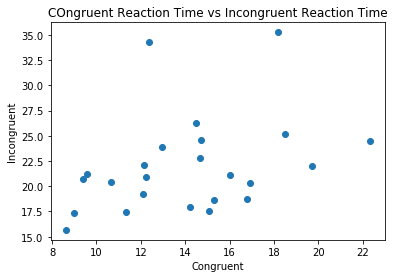

In [6]:
# plotting reaction times for congruent and incongruent sets
plt.scatter(x= df['Congruent'],y =df['Incongruent']);
plt.xlabel('Congruent')
plt.ylabel('Incongruent')
plt.title('COngruent Reaction Time vs Incongruent Reaction Time');

    For Congruent (word-color match), most likey reaction time was in 14-15 seconds.
    For inCongruent (word-color mismatch), most likey reaction time was in 20-21 seconds.
    Both distributions are right skewed. 
    The incongruent set shows no values in the 27 to 33.5 range.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [12]:
# Perform the statistical test here
#we want to calculate the Standard Deviation.so we compute the variance first
a_var = df['Congruent'].var()
b_var = df['Incongruent'].var()
# calculate standard deviation 
df_std=np.sqrt((a_var+b_var)/2)
print('standard deviation is {}'.format(df_std))

standard deviation is 4.223788945182042


In [13]:
# Point Estimate for Null Hypothesis
mean_diff=(df['Congruent'].mean()-df['Incongruent'].mean())
mean_diff

-7.9647916666666667

In [15]:
# calculate differences between the two response times
diff=(df['Congruent']-df['Incongruent'])
# Mean of difference in response times
mean_diff_resp_time = round(diff.mean(),4)
mean_diff_resp_time

-7.9648000000000003

In [19]:
# Calculate squared deviations from the mean
sq_dev_from_mean = (diff - mean_diff_resp_time)**2
std_dev_sq = sum(sq_dev_from_mean)/((df.shape[0])-1)
#calculate standard deviation for sample
sample_std_dev = math.sqrt(std_dev_sq)
sample_std_dev

4.864826910366503

In [21]:
# calculate t-value
t = (mean_diff_resp_time/sample_std_dev)*(math.sqrt(df.shape[0]))
t

-8.0207153359335646

    Observations:
    Assume alpha values of 0.05
    Hence, we have 0.025 in each tail
    With N-1 degrees of freedon, ie. 23, we get positive and negative t-critical values from t-table
    These are : +2.069 and -2.069
    Because our t-value value is beyond the t-critical values,So we reject the Null Hypothesis
    So It takes less time with color-word match than mismatch.
    Being an experimental design, we can make a causal statement that the Stroop efect holds and that word-color congruence does impact the response time.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

**The first reason is that Reading is quicker than analysing the color. When the two are matched, the process is simple. When the two are micmatched as in the second experiment, it takes focus and conscious effort to dissociate the two.**

**picture-word interference, The PWIP, an adaptation of the Stroop task, involves the presentation of visual or auditory competitor words with the pictures to be named. Participants are required to name the picture while ignoring the competitor word that is typically superimposed on the picture. The type of competitor can be manipulated as well as the timing relation between presentation of the competitor and the target.**